In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('Online Retail.xlsx')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


######  Data cleaning

In [8]:
df.duplicated().sum()

5268

In [12]:
#dropping duplicated values
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [17]:
#dropping missing values
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


###### Exploratory data analysis

What are the top 10 best-selling products?

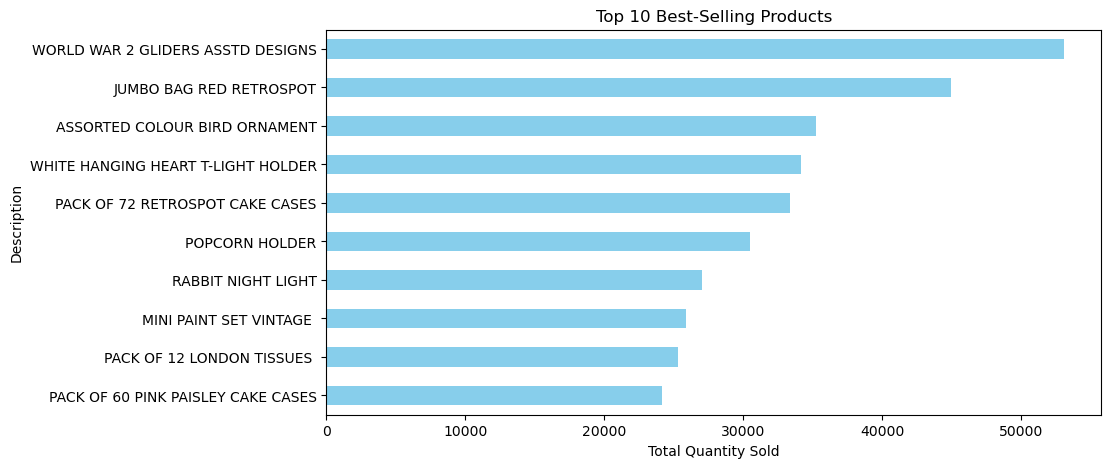

In [19]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Best-Selling Products', figsize=(10,5), color='skyblue')
plt.xlabel('Total Quantity Sold')
plt.gca().invert_yaxis()
plt.show()


What countries contribute most to sales?

C:\Users\JAMES TECH\AppData\Local\Temp\ipykernel_5308\3188599497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


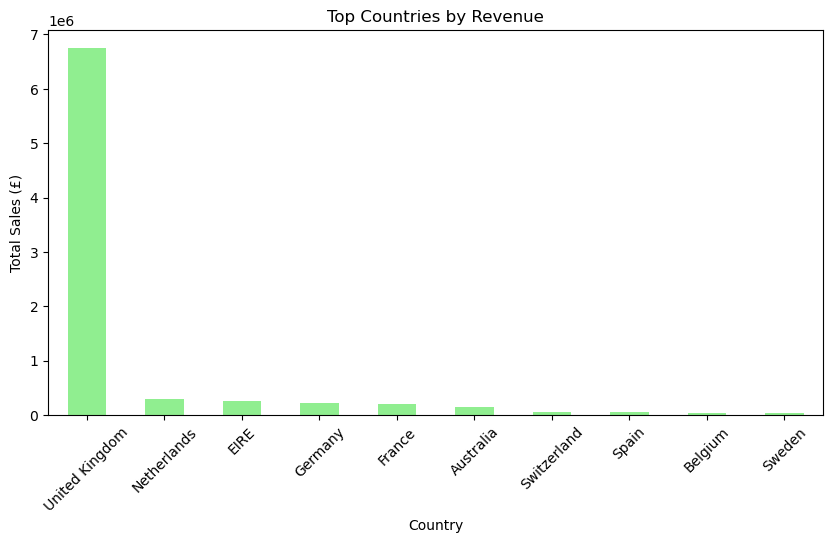

In [20]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', figsize=(10,5), title='Top Countries by Revenue', color='lightgreen')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45)
plt.show()


How does sales trend over time (monthly)?

C:\Users\JAMES TECH\AppData\Local\Temp\ipykernel_5308\2794183816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


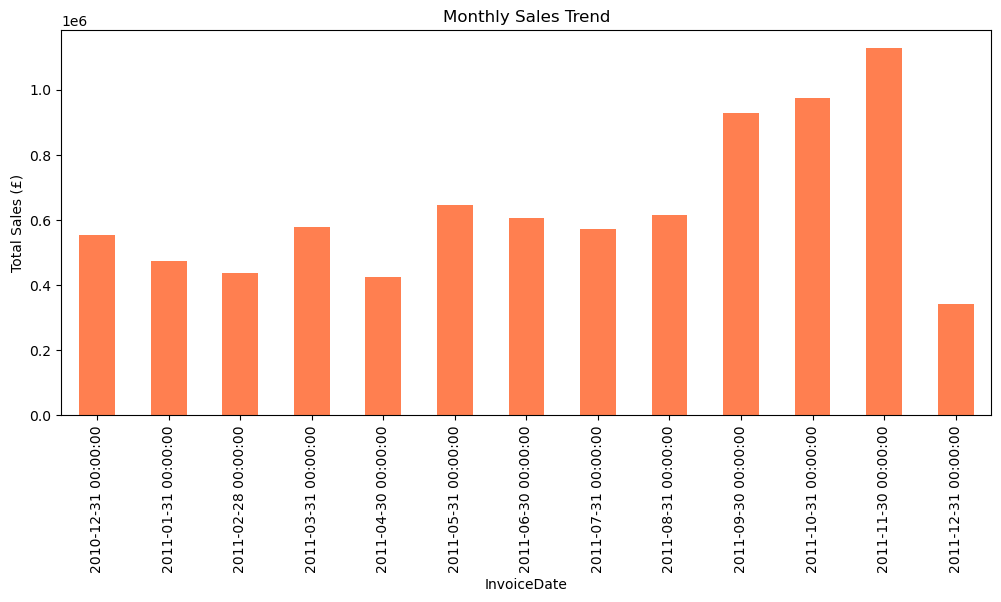

In [25]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
monthly_sales = df.set_index('InvoiceDate').resample('M')['Sales'].sum()
monthly_sales.plot(kind = 'bar',figsize=(12,5), color='coral')
plt.title("Monthly Sales Trend")
plt.ylabel('Total Sales (£)')
plt.show()


How many products are typically bought per invoice?

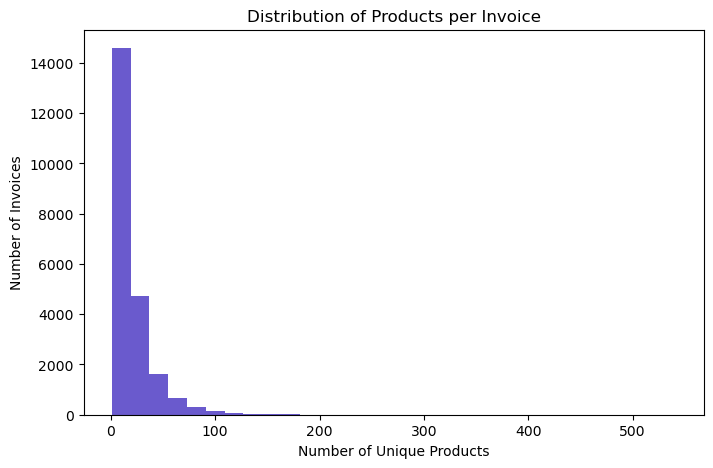

In [26]:
invoice_item_counts = df.groupby('InvoiceNo')['StockCode'].nunique()
invoice_item_counts.plot(kind='hist', bins=30, figsize=(8,5), color='slateblue')
plt.title('Distribution of Products per Invoice')
plt.xlabel('Number of Unique Products')
plt.ylabel('Number of Invoices')
plt.show()


What are the top 10 revenue-generating products?

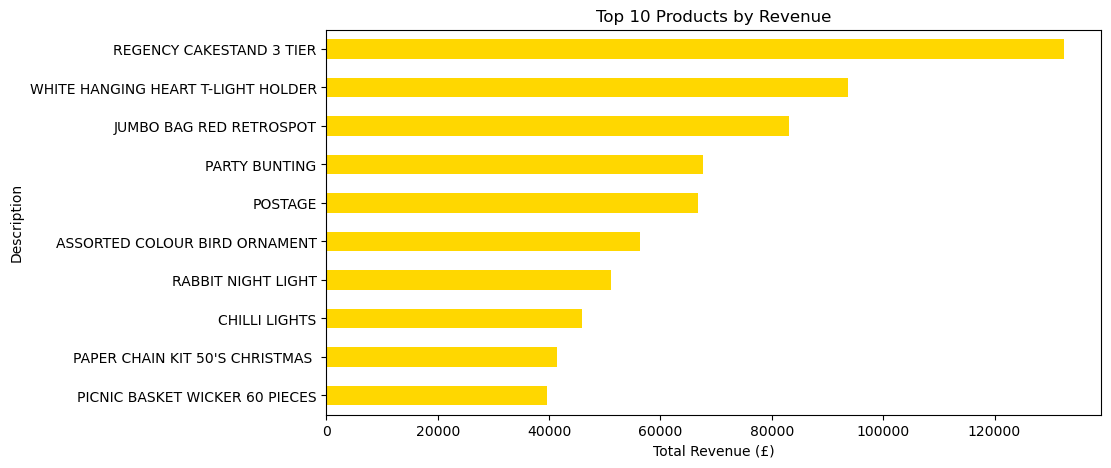

In [27]:
product_revenue = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)
product_revenue.plot(kind='barh', figsize=(10,5), color='gold')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue (£)')
plt.gca().invert_yaxis()
plt.show()


Are there any products with high return (negative quantity) rates?

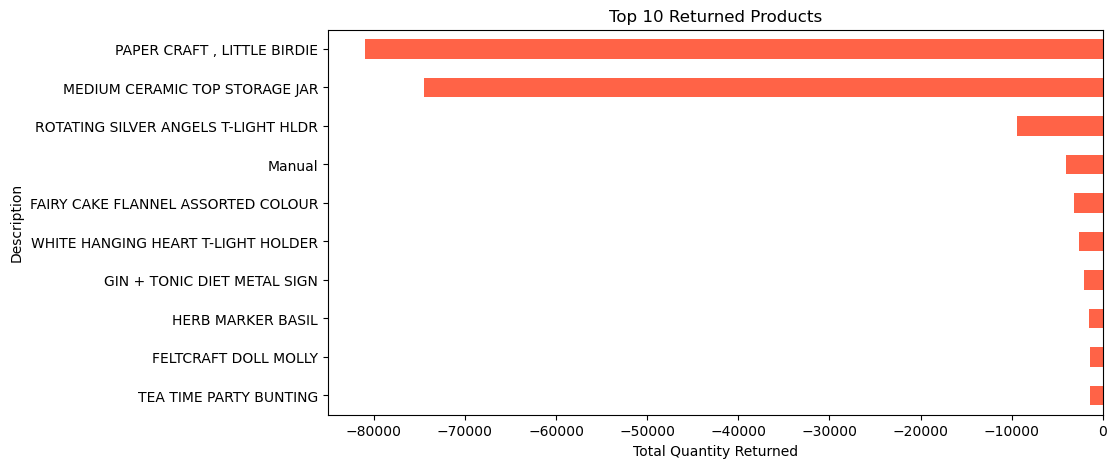

In [28]:
returns = df[df['Quantity'] < 0]
top_returns = returns.groupby('Description')['Quantity'].sum().sort_values().head(10)
top_returns.plot(kind='barh', figsize=(10,5), color='tomato')
plt.title('Top 10 Returned Products')
plt.xlabel('Total Quantity Returned')
plt.gca().invert_yaxis()
plt.show()
